# Flight Fare Predictor

## Import necessary libraries

In [15]:
# Base
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Config
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.4f}'.format

sns.set_style('darkgrid')


## Import data

- Since data in excel file, use pandas `read_excel` to load data into a dataframe.
- After importing check for null values and perform EDA.

In [16]:
df_train = pd.read_excel('./data/Data_Train.xlsx')
df_train.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [17]:
df_test = pd.read_excel('./data/Test_set.xlsx')
df_test.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [18]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [19]:
# Null values
df_train.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [20]:
df_train[df_train.Route.isnull()]


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [21]:
# Drop null values
df_train.dropna(inplace=True)
df_train.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [22]:
df_train.Duration.value_counts()


2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

## Exploratory Data Analysis

Convert the Date_of_Journey column from object to the appropriate datetime data type. Then extract day, month and day of week for feature engineering.

In [23]:
# Day
df_train['Journey_day'] = pd.to_datetime(df_train.Date_of_Journey).dt.day
# Month
df_train['Journey_month'] = pd.to_datetime(df_train.Date_of_Journey).dt.month
# Day of week Monday=0, Sunday=6
df_train['Journey_dayofweek'] = pd.to_datetime(
    df_train.Date_of_Journey).dt.dayofweek
df_train.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_dayofweek
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,6
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,4
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,3
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,3


In [24]:
# Date_of_Journey column no longer required
df_train.drop(columns='Date_of_Journey', inplace=True)


In [25]:
# Extracting hour and minute information from Dep_Time column
df_train = df_train.assign(Dep_hour=pd.to_datetime(df_train.Dep_Time).dt.hour,
                           Dep_min=pd.to_datetime(df_train.Dep_Time).dt.minute)
# Dep_Time column no longer required
df_train.drop(columns='Dep_Time', inplace=True)
df_train.head()


,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_dayofweek,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,6,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,4,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,3,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,3,16,50


In [26]:
# Extracting hour and minute information from Arrival_Time column
df_train = df_train.assign(Arr_hour=pd.to_datetime(df_train.Arrival_Time).dt.hour,
                           Arr_min=pd.to_datetime(df_train.Arrival_Time).dt.minute)
# Arrival_Time column no longer required
df_train.drop(columns='Arrival_Time', inplace=True)
df_train.head()


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_dayofweek,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,6,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,4,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,3,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,3,16,50,21,35


In [38]:
# Extracting hour and minute information from Duration column
df_train = df_train.assign(Duration_hours=lambda x: x.Duration.str.split('h').str[0],
                           Duration_minutes=lambda x: x.Duration.str.split('m').str[0].str.split().str[1])

df_train.head()


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_dayofweek,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,6,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,4,9,25,4,25,19,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,3,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,3,16,50,21,35,4,45


In [40]:
df_train.isnull().sum()


Airline                 0
Source                  0
Destination             0
Route                   0
Duration                0
Total_Stops             0
Additional_Info         0
Price                   0
Journey_day             0
Journey_month           0
Journey_dayofweek       0
Dep_hour                0
Dep_min                 0
Arr_hour                0
Arr_min                 0
Duration_hours          0
Duration_minutes     1032
dtype: int64

In [41]:
# Fill NaN values with 0 in Duration_minutes column
df_train.Duration_minutes.fillna(0, inplace=True)
# Duration column no longer required
df_train.drop(columns='Duration', inplace=True)
df_train.head()


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_dayofweek,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,6,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,4,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,3,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,3,16,50,21,35,4,45


In [42]:
df_train.Total_Stops.value_counts()


1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [43]:
# Encoding Total_Stops column
df_train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2,
                 "3 stops": 3, "4 stops": 4}, inplace=True)
df_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10682 non-null  object
 1   Source             10682 non-null  object
 2   Destination        10682 non-null  object
 3   Route              10682 non-null  object
 4   Total_Stops        10682 non-null  int64 
 5   Additional_Info    10682 non-null  object
 6   Price              10682 non-null  int64 
 7   Journey_day        10682 non-null  int64 
 8   Journey_month      10682 non-null  int64 
 9   Journey_dayofweek  10682 non-null  int64 
 10  Dep_hour           10682 non-null  int64 
 11  Dep_min            10682 non-null  int64 
 12  Arr_hour           10682 non-null  int64 
 13  Arr_min            10682 non-null  int64 
 14  Duration_hours     10682 non-null  object
 15  Duration_minutes   10682 non-null  object
dtypes: int64(9), object(7)
memory usage: 1.4

In [44]:
df_train.Duration_hours = pd.to_numeric(df_train.Duration_hours)


ValueError: Unable to parse string "5m" at position 6474

In [45]:
df_train[df_train.Duration_hours == '5m']


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_dayofweek,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_minutes
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,2,No info,17327,3,6,0,16,50,16,55,5m,0


In [46]:
# Correcting data type
df_train.Duration_minutes = pd.to_numeric(df_train.Duration_minutes)


In [47]:
df_train.Duration_minutes.value_counts()


30    1446
0     1032
20     997
50     972
35     939
55     910
15     903
45     896
25     803
40     636
5      623
10     525
Name: Duration_minutes, dtype: int64

In [48]:
# For one of the data points, the duration is 5m which is impossible, hence, removing that datapoint
df_train = df_train[df_train.Duration_hours != '5m']
# Correcting data type
df_train.Duration_hours = pd.to_numeric(df_train.Duration_hours)


In [49]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10681 non-null  object
 1   Source             10681 non-null  object
 2   Destination        10681 non-null  object
 3   Route              10681 non-null  object
 4   Total_Stops        10681 non-null  int64 
 5   Additional_Info    10681 non-null  object
 6   Price              10681 non-null  int64 
 7   Journey_day        10681 non-null  int64 
 8   Journey_month      10681 non-null  int64 
 9   Journey_dayofweek  10681 non-null  int64 
 10  Dep_hour           10681 non-null  int64 
 11  Dep_min            10681 non-null  int64 
 12  Arr_hour           10681 non-null  int64 
 13  Arr_min            10681 non-null  int64 
 14  Duration_hours     10681 non-null  int64 
 15  Duration_minutes   10681 non-null  int64 
dtypes: int64(11), object(5)
memory usage: 1.

In [50]:
df_train.Airline.value_counts()


Jet Airways                          3849
IndiGo                               2053
Air India                            1750
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

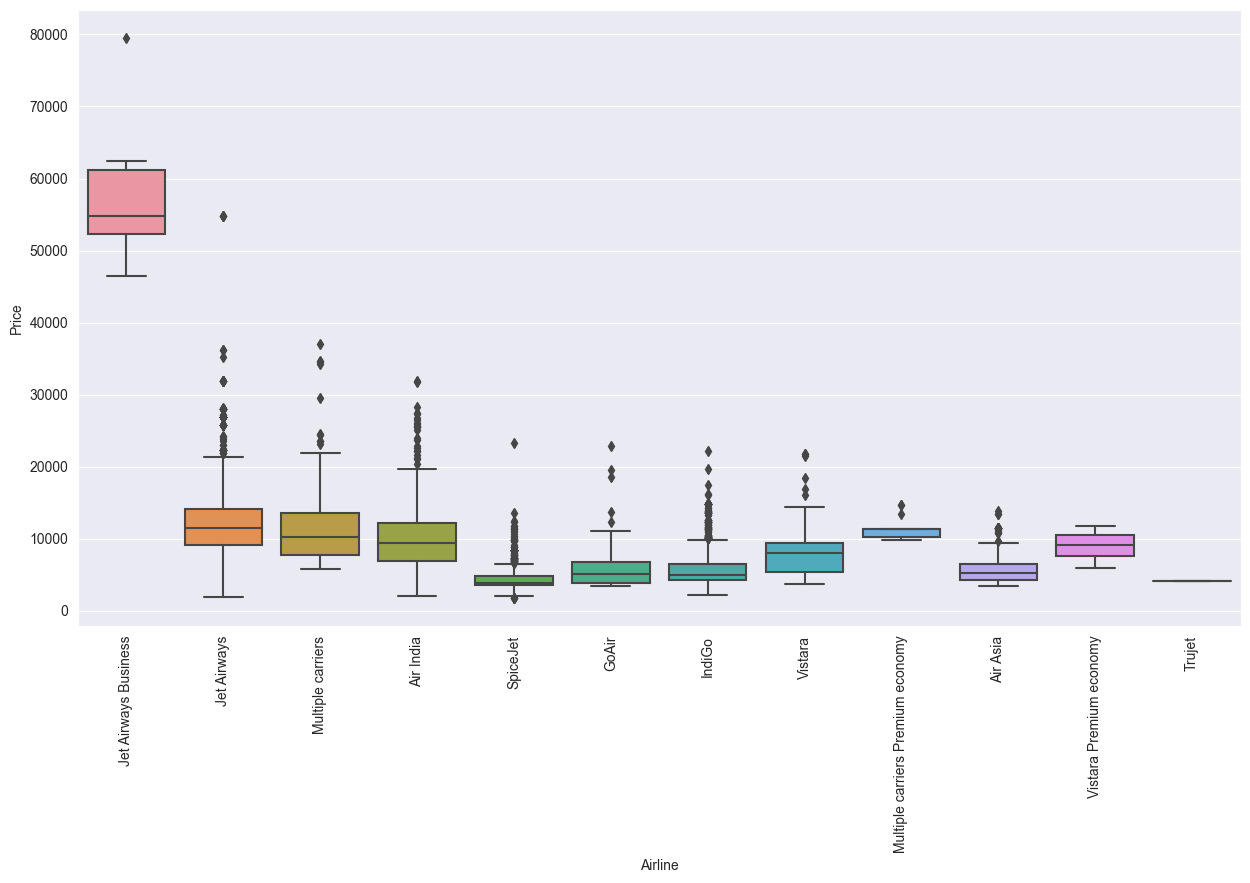

In [55]:
# Distribution of flight fare with airlines
plt.figure(figsize=(15, 8))

sns.boxplot(data=df_train.sort_values(
    'Price', ascending=False), y='Price', x='Airline')

plt.xticks(rotation=90)
plt.show()


From the above graph, it is clear that Jet Airways Business is the costliest airline. Apart from that, all other airline have similar fare prices.

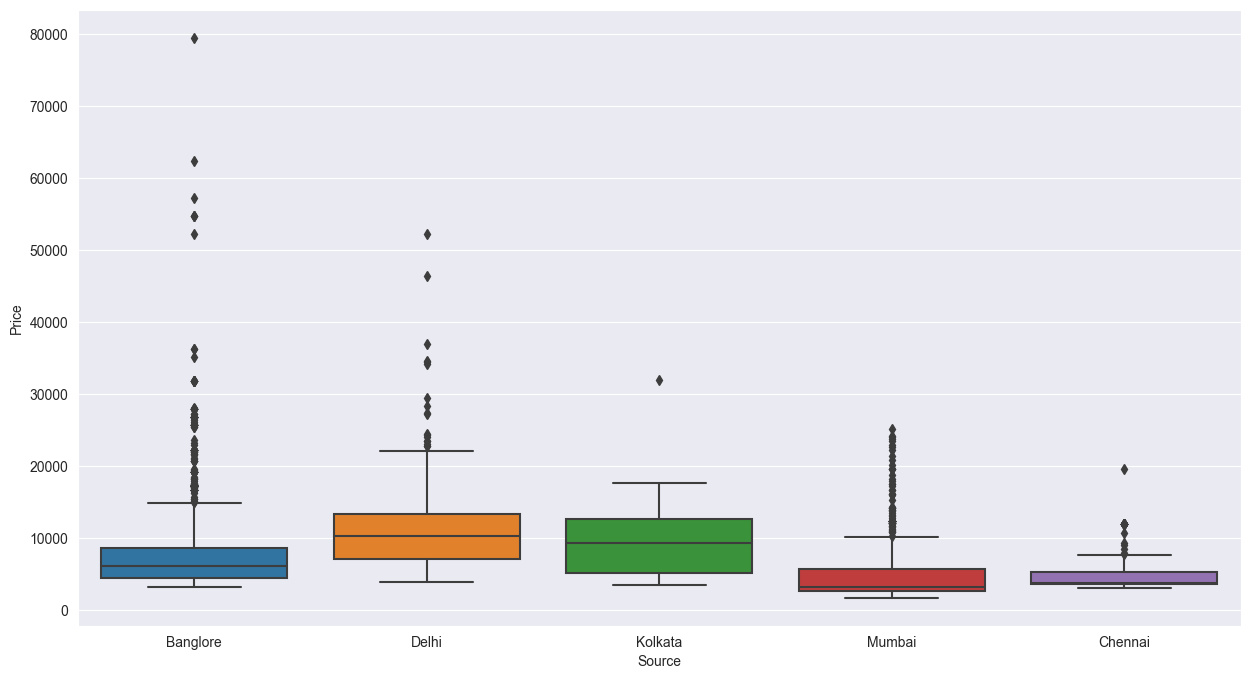

In [57]:
# Distribution of flight fare with sources
plt.figure(figsize=(15, 8))

sns.boxplot(data=df_train.sort_values(
    'Price', ascending=False), y='Price', x='Source')

plt.show()


In [65]:
df_train.Destination.replace('New Delhi', 'Delhi', inplace=True)


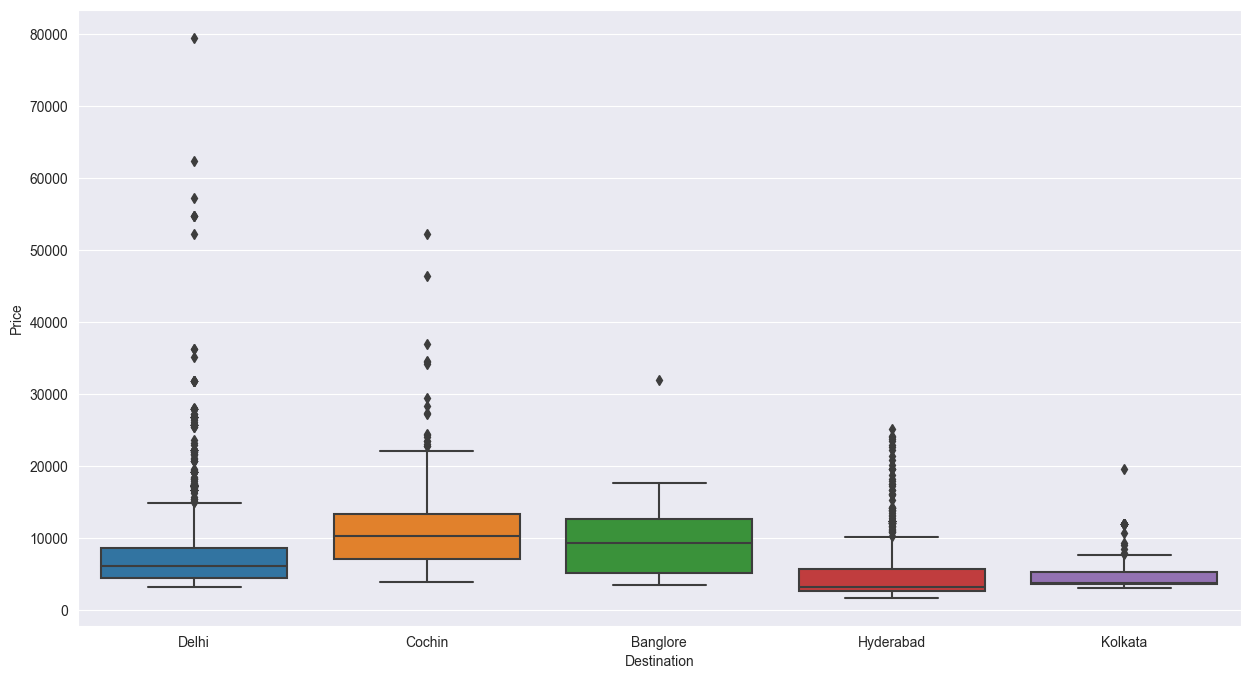

In [66]:
# Distribution of flight fare with destinations
plt.figure(figsize=(15, 8))

sns.boxplot(data=df_train.sort_values(
    'Price', ascending=False), y='Price', x='Destination')

plt.show()


All sources and destinations have similar median flight fare prices respectively.

### Categorical Encoding

In [67]:
from sklearn.preprocessing import OneHotEncoder


Airlines, Source and Destination are nominal categorical columns. Hence, `OneHotEncoder` is used for encoding these columns.

In [68]:
# Drop first to avoid multi-collinearity
airline_encoder = OneHotEncoder(drop='first')

encoded_airline = airline_encoder.fit_transform(
    df_train[['Airline']].to_numpy()).toarray()

encoded_airline = pd.DataFrame(
    data=encoded_airline, columns=airline_encoder.categories_[0][1:])
encoded_airline


,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
10676,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
10677,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
10678,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
10679,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000


In [71]:
# Drop first to avoid multi-collinearity
source_encoder = OneHotEncoder(drop='first')

encoded_source = source_encoder.fit_transform(
    df_train[['Source']].to_numpy()).toarray()

encoded_source = pd.DataFrame(
    data=encoded_source, columns=['s_'+source for source in source_encoder.categories_[0][1:]])
encoded_source


,s_Chennai,s_Delhi,s_Kolkata,s_Mumbai
0,0.0000,0.0000,0.0000,0.0000
1,0.0000,0.0000,1.0000,0.0000
2,0.0000,1.0000,0.0000,0.0000
3,0.0000,0.0000,1.0000,0.0000
4,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...
10676,0.0000,0.0000,1.0000,0.0000
10677,0.0000,0.0000,1.0000,0.0000
10678,0.0000,0.0000,0.0000,0.0000
10679,0.0000,0.0000,0.0000,0.0000


In [72]:
# Drop first to avoid multi-collinearity
destination_encoder = OneHotEncoder(drop='first')

encoded_destination = destination_encoder.fit_transform(
    df_train[['Destination']].to_numpy()).toarray()

encoded_destination = pd.DataFrame(
    data=encoded_destination, columns=['d_'+destination for destination in destination_encoder.categories_[0][1:]])
encoded_destination


,d_Cochin,d_Delhi,d_Hyderabad,d_Kolkata
0,0.0000,1.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,0.0000
2,1.0000,0.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,0.0000
4,0.0000,1.0000,0.0000,0.0000
...,...,...,...,...
10676,0.0000,0.0000,0.0000,0.0000
10677,0.0000,0.0000,0.0000,0.0000
10678,0.0000,1.0000,0.0000,0.0000
10679,0.0000,1.0000,0.0000,0.0000


In [73]:
# Concatenating encoded columns with the original data
encoded_df_train = pd.concat([df_train.reset_index(drop=True), encoded_airline.reset_index(drop=True),
                              encoded_source.reset_index(drop=True), encoded_destination.reset_index(drop=True)], axis=1)
# Airline, Source and Destination columns no longer required
encoded_df_train.drop(
    columns=['Airline', 'Source', 'Destination'], inplace=True)
encoded_df_train.head()


,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_dayofweek,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_minutes,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,s_Chennai,s_Delhi,s_Kolkata,s_Mumbai,d_Cochin,d_Delhi,d_Hyderabad,d_Kolkata
0,BLR → DEL,0,No info,3897,24,3,6,22,20,1,10,2,50,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
1,CCU → IXR → BBI → BLR,2,No info,7662,5,1,5,5,50,13,15,7,25,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,DEL → LKO → BOM → COK,2,No info,13882,6,9,4,9,25,4,25,19,0,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
3,CCU → NAG → BLR,1,No info,6218,5,12,3,18,5,23,30,5,25,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,BLR → NAG → DEL,1,No info,13302,3,1,3,16,50,21,35,4,45,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


In [74]:
encoded_df_train.Additional_Info.value_counts()


No info                         8343
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

Route column implies number of stops hence drop it to avoid multi-collinearity. Additional_info column has 80% No info values. Hence, drop it to reduce dimensions.

In [75]:
encoded_df_train.drop(columns=['Route', 'Additional_Info'], inplace=True)
encoded_df_train.head()


,Total_Stops,Price,Journey_day,Journey_month,Journey_dayofweek,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_minutes,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,s_Chennai,s_Delhi,s_Kolkata,s_Mumbai,d_Cochin,d_Delhi,d_Hyderabad,d_Kolkata
0,0,3897,24,3,6,22,20,1,10,2,50,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
1,2,7662,5,1,5,5,50,13,15,7,25,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,2,13882,6,9,4,9,25,4,25,19,0,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
3,1,6218,5,12,3,18,5,23,30,5,25,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,1,13302,3,1,3,16,50,21,35,4,45,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


In [76]:
# Final training dataset
encoded_df_train.shape


(10681, 30)

In [77]:
df_test.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


## Feature Selection

Finding out the more important features in the dataset which explain the most variance in the target variable. This can be done using:
- Correlation heatmap
- `feature_importance_`
- `SelectKBest`

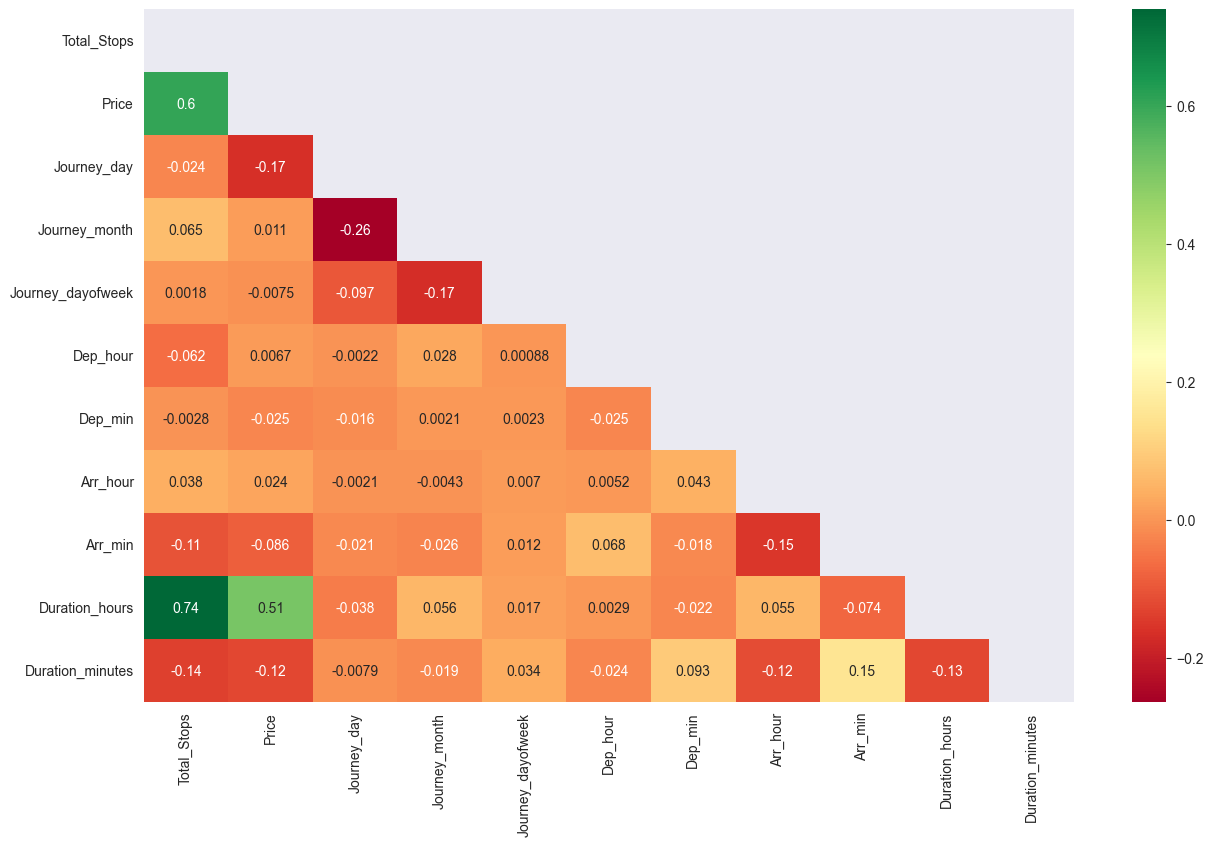

In [108]:
# Correlation heatmap
heatmap_df = df_train.drop(
    columns=['Airline', 'Source', 'Destination', 'Additional_Info', 'Route'])
plt.figure(figsize=(15, 9))
sns.heatmap(data=heatmap_df.corr(), annot=True,
            mask=np.triu(heatmap_df.corr()), cmap='RdYlGn')
plt.show()


In [112]:
# Independent variables
X = encoded_df_train.drop(columns='Price')
# Dependent variable
y = encoded_df_train.Price


In [113]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)


ExtraTreesRegressor()

In [114]:
print(selection.feature_importances_)


[2.33812147e-01 9.61763850e-02 6.58879775e-02 3.68549103e-02
 2.51014439e-02 2.18984623e-02 2.99302623e-02 2.03158414e-02
 1.27569638e-01 1.85393598e-02 8.43554627e-03 2.22910771e-03
 2.17711016e-02 1.34062416e-01 6.68284533e-02 1.80056446e-02
 9.64637562e-04 6.74783810e-03 1.06949169e-04 4.36244891e-03
 1.06187262e-04 8.51222495e-04 1.20856060e-02 5.77775162e-03
 6.78172700e-03 1.00481444e-02 1.51776957e-02 8.62991202e-03
 9.41182887e-04]


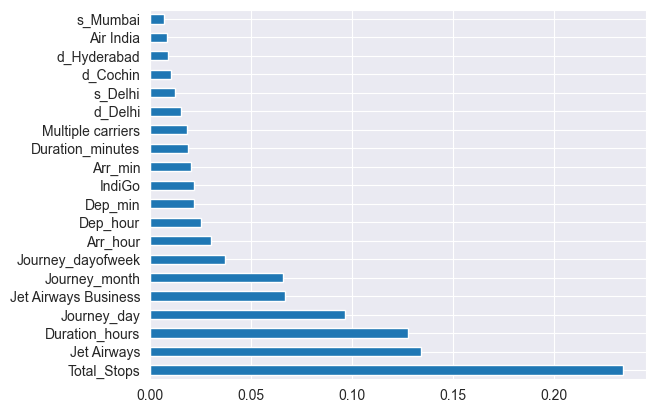

In [116]:
# Top 20 features
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


## Random Forest Regression

In [117]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [118]:
# Scaling the data not required for random forest regressor. Directly fitting the model
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)


RandomForestRegressor()

### Evaluation

In [120]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [121]:
# Testing r2 score
y_pred = reg_rf.predict(X_test)
r2_score(y_test, y_pred)


0.7870729376986372

In [122]:
# Training r2 score
r2_score(y_train, reg_rf.predict(X_train))


0.9529401248401832

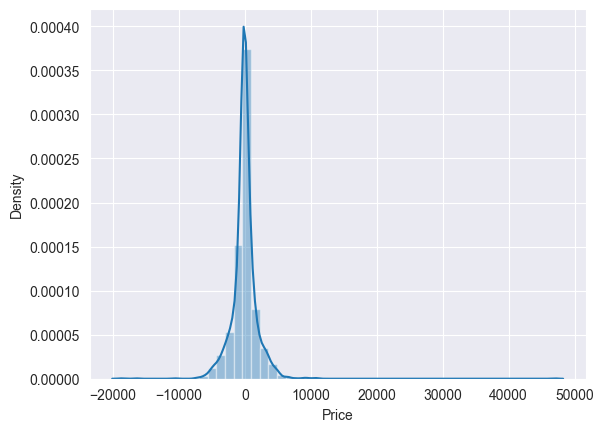

In [124]:
# Plotting residuals
sns.distplot(y_test-y_pred)
plt.show()


Residuals are normally distributed, hence, regression is a valid model for this data.

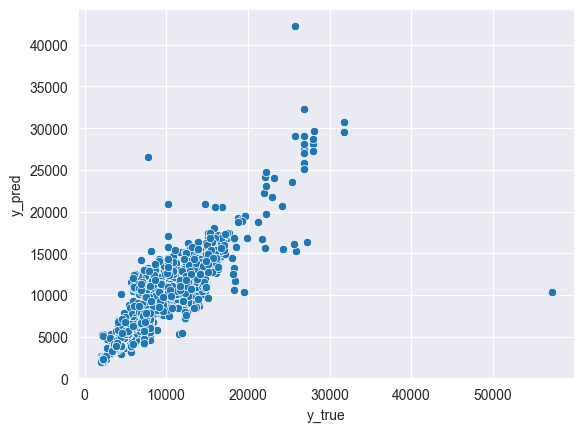

In [127]:
sns.scatterplot(x=y_test.values, y=y_pred)
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.show()


In [128]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))


MAE: 1170.5219942848448
MSE: 4495265.247695873
RMSE: 2120.204058032121


## Hyperparameter Tuning

In [129]:
from sklearn.model_selection import RandomizedSearchCV


In [130]:
# Hyperparameter distribution

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [131]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


In [132]:
# Random search of hyperparameters using 5 fold cross validation across 100 different combinations
reg_rf_tuned = RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid,
                                  n_iter=100, scoring='neg_mean_squared_error',
                                  n_jobs=-1)
reg_rf_tuned.fit(X_train, y_train)


RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error')

In [133]:
# Best hyperparameters
reg_rf_tuned.best_params_


{'n_estimators': 1100,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

### Evaluation

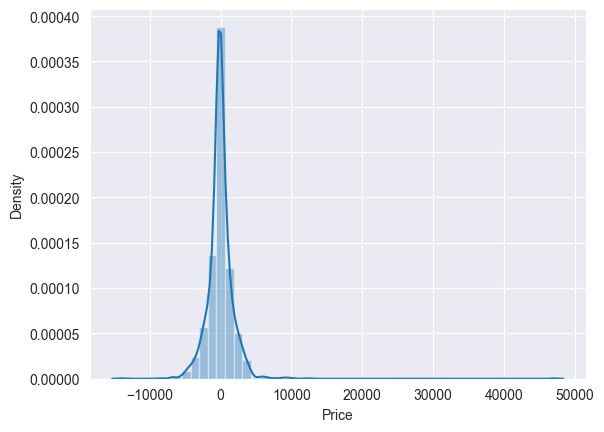

In [134]:
prediction = reg_rf_tuned.predict(X_test)
sns.distplot(y_test-prediction)
plt.show()


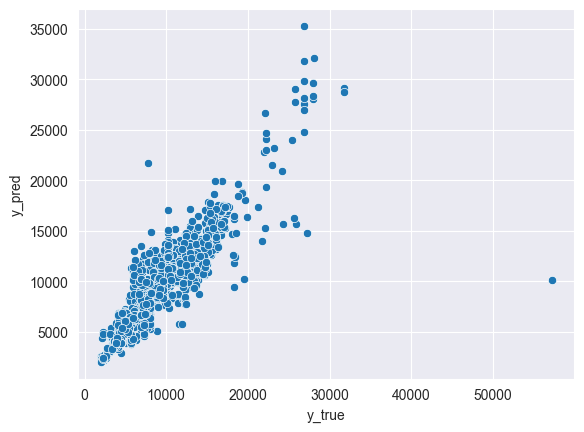

In [135]:
sns.scatterplot(x=y_test.values, y=prediction)
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.show()


In [136]:
# Testing r2 score
r2_score(y_test, prediction)


0.8151386660107389

In [137]:
print('MAE:', mean_absolute_error(y_test, prediction))
print('MSE:', mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))


MAE: 1129.1201792521636
MSE: 3902748.2995490814
RMSE: 1975.5374710566948


## Pickle the model and encoders

In [138]:
import pickle

# Model
pickle.dump(reg_rf_tuned, open('model.pkl', 'wb'))
# Airline encoder
pickle.dump(airline_encoder, open('airline_encoder.pkl', 'wb'))
# Source encoder
pickle.dump(source_encoder, open('source_encoder.pkl', 'wb'))
# Destination encoder
pickle.dump(destination_encoder, open('destination_encoder.pkl', 'wb'))
